In [ ]:
#Source: https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

!pip install yfinance

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=e9f435381fc3a82b6b063a30f3daf7361434be0b65e38faa889f48d0cadca147
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install giotto-tda

     |████████████████████████████████| 1.5MB 3.9MB/s 
     |████████████████████████████████| 3.2MB 14.3MB/s 
     |████████████████████████████████| 22.2MB 52.2MB/s 
     |████████████████████████████████| 399kB 45.3MB/s 
     |████████████████████████████████| 25.9MB 56.5MB/s 
     |████████████████████████████████| 13.2MB 39.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from gtda.homology import VietorisRipsPersistence

In [ ]:
import gtda.diagrams

In [ ]:
start = datetime.datetime(1987,12,22)
end = datetime.datetime(2016,12,8)
Symbols = ['^GSPC','^DJI','^IXIC','^RUT']

In [ ]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,1 : ^DJI,2 : ^IXIC,3 : ^RUT,

In [ ]:
gspc_1 = stock_final[stock_final['Name'] == '^GSPC'].index
gspc = stock_final[stock_final['Name'] == '^GSPC']['Close']
dji_1 = stock_final[stock_final['Name'] == '^DJI'].index
dji = stock_final[stock_final['Name'] == '^DJI']['Close']
ixic_1 = stock_final[stock_final['Name'] == '^IXIC'].index
ixic = stock_final[stock_final['Name'] == '^IXIC']['Close']
rut_1 = stock_final[stock_final['Name'] == '^RUT'].index
rut = stock_final[stock_final['Name'] == '^RUT']['Close']

In [ ]:
import math
adjusted_gspc = []
adjusted_dji = []
adjusted_ixic = []
adjusted_rut = []
for i in range(1,7301):
  adjusted_gspc.append(math.log(gspc[i]/gspc[i-1]))
  adjusted_dji.append(math.log(dji[i]/dji[i-1]))
  adjusted_ixic.append(math.log(ixic[i]/ixic[i-1]))
  adjusted_rut.append(math.log(rut[i]/rut[i-1]))

In [ ]:
adjusted_prices = pd.DataFrame()
adjusted_prices['Dates'] = gspc_1[1:]
adjusted_prices['GSPC'] = adjusted_gspc
adjusted_prices['DJI'] = adjusted_dji
adjusted_prices['IXIC'] = adjusted_ixic
adjusted_prices['RUT'] = adjusted_rut
adjusted_prices.to_csv('Adjusted_prices.csv')

In [ ]:
!zip Adjusted_prices.zip *.csv
!mv Adjusted_prices.zip "/content/drive/My Drive"

  adding: Adjusted_prices.csv (deflated 58%)


In [ ]:
l_1 = []
l_2 = []

for i in range(0, 7301-100):
  point_cloud = []
  for j in range(i,i+100):
    point_cloud.append([adjusted_gspc[j], adjusted_dji[j], adjusted_ixic[j], adjusted_rut[j]])
  pointcloud = np.array(point_cloud).reshape(1,100,4)
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  value = gtda.diagrams.Amplitude(metric_params={"n_layers":250} , metric ='landscape', order = None).fit_transform(diagrams)
  l_1.append(value[0][0])
  l_2.append(value[0][1])

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

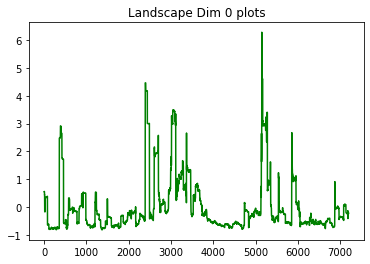

In [ ]:
#Landscape dim 0 plots:

plt.title("Landscape Dim 0 plots") 
y_1 = stats.zscore(np.array(l_1))
plt.plot(np.arange(0,7201), y_1 , color ="green")  
plt.show()

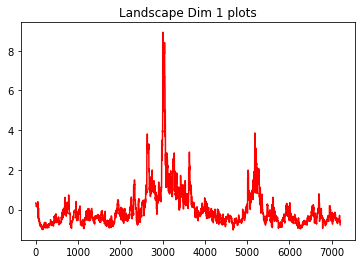

In [ ]:
plt.title("Landscape Dim 1 plots") 
y_2 = stats.zscore(np.array(l_2))
plt.plot(np.arange(0,7201), y_2 , color ="red")  
plt.show()

In [ ]:
ord_1 = np.argsort(-y_1)[:100]
ord_2 = np.argsort(-y_2)[:100]

In [ ]:
#First 100 highest valuescorresponding to dim 0
gspc_1[ord_1]

DatetimeIndex(['2008-05-22', '2008-05-21', '2008-05-23', '2008-06-05',
               '2008-06-03', '2008-06-04', '2008-05-28', '2008-05-27',
               '2008-06-02', '2008-05-30', '2008-05-29', '2008-06-06',
               '2008-06-13', '2008-06-12', '2008-06-11', '2008-06-23',
               '2008-06-10', '2008-06-17', '2008-06-19', '2008-06-20',
               '2008-06-18', '2008-06-16', '2008-06-09', '1997-06-09',
               '1997-06-06', '1997-06-10', '1997-06-11', '1997-06-13',
               '1997-06-16', '1997-06-12', '1997-06-17', '1997-06-18',
               '1997-06-19', '1997-06-20', '1997-06-05', '1997-08-11',
               '1997-08-13', '1997-08-12', '1997-08-14', '1997-08-08',
               '1997-07-18', '1997-07-31', '1997-06-30', '1997-07-30',
               '1997-08-01', '1997-07-25', '1997-07-28', '1997-07-11',
               '1997-07-02', '1997-08-05', '1997-08-04', '1997-07-14',
               '1997-07-01', '1997-07-07', '1997-07-03', '1997-07-15',
      

In [ ]:
#First 100 highest valuescorresponding to dim 1
gspc_1[ord_2]

DatetimeIndex(['1999-11-23', '1999-11-24', '1999-11-19', '1999-11-22',
               '2000-01-11', '1999-12-30', '2000-01-03', '1999-12-31',
               '2000-01-04', '1999-12-29', '2000-01-07', '2000-01-06',
               '2000-01-05', '2000-01-10', '1999-12-22', '1999-12-21',
               '1999-12-28', '2000-01-13', '2000-01-12', '1999-12-14',
               '1999-12-17', '1999-12-02', '1999-12-20', '1999-12-15',
               '1999-12-13', '1999-12-16', '1999-11-26', '1999-11-29',
               '1999-12-09', '1999-12-10', '1999-12-23', '2000-01-14',
               '2000-01-20', '2000-01-21', '2000-01-19', '2000-01-18',
               '1999-12-27', '1999-12-08', '1999-12-07', '1999-12-06',
               '1999-12-03', '2000-01-25', '2000-01-24', '2000-01-26',
               '1999-11-11', '1999-11-10', '1999-11-09', '2000-01-27',
               '1999-11-18', '1999-11-17', '1999-12-01', '2000-02-04',
               '1999-11-30', '1999-11-08', '1999-11-12', '1999-11-16',
      